In [33]:
# %pip install scikit-learn

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Random Forest Run Function

In [95]:
def run_random_forest(X,y):
    # Define hyperparameter grids
    depths_grid = [2, 5, 10, 15]
    numTrees_grid = [20, 100, 500]
    k_grid = [50, 70, 200, 280]  # Varying values for k

    max_accuracy = float('-inf')
    best_depth = -1
    best_numTrees = 0
    best_model = None
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Lists to store evaluation metrics for different k values
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for trees_hp, depth_hp, k_hp in itertools.product(numTrees_grid, depths_grid, k_grid):
        try:
            # Feature selection
            selector = SelectKBest(chi2, k=k_hp)
            X_train_selected = selector.fit_transform(X_train, y_train)
            X_test_selected = selector.transform(X_test)

            # RF Model
            model = RandomForestClassifier(n_estimators=trees_hp, max_depth=depth_hp, random_state=42)
            model.fit(X_train_selected, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test_selected)

            # Evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            f1 = f1_score(y_test, y_pred, average='macro')

            # Store evaluation metrics
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

            # print(f'Depth = {depth_hp}, Number of Trees = {trees_hp}, k = {k_hp}:')
            # print('Accuracy: {:.4f}'.format(accuracy))
            # print('Precision (macro): {:.4f}'.format(precision))
            # print('Recall (macro): {:.4f}'.format(recall))
            # print('F1 Score (macro): {:.4f}'.format(f1))
            # print()

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_numTrees = trees_hp
                best_depth = depth_hp
                best_k = k_hp
                best_model = model

        except Exception as e:
            print(e)

    print('\nThe best model has Max Depth = {}, Number of Trees = {}, k = {}, and Max Accuracy is {:.4f}'.format(
        best_depth, best_numTrees, best_k, max_accuracy))

    # Plot evaluation metrics
    fig, ax = plt.subplots()
    ax.bar(range(len(accuracies)), accuracies, label='Accuracy')
    ax.bar(range(len(precisions)), precisions, label='Precision')
    ax.bar(range(len(recalls)), recalls, label='Recall')
    ax.bar(range(len(f1_scores)), f1_scores, label='F1 Score')
    ax.set_xticks(range(len(accuracies)))
    # ax.set_xticklabels(['Depth={}, Trees={}, k={}'.format(d, t, k) for d, t, k in itertools.product(depths_grid, numTrees_grid, k_grid)], rotation=45)
    ax.set_xlabel('Hyperparameters')
    ax.set_ylabel('Metric Score')
    ax.set_title('Evaluation Metrics for Different Hyperparameter Combinations and k Values')
    ax.legend()
    plt.tight_layout()
    plt.show()



# Data

In [96]:
df = pd.read_csv('../../ccm-bioinfomatica-lab/Hackaton_junio2023/Resistencia/data/relative_order_assembly.csv')
df16 = df[df["Year"]==16]
df17 = df[df["Year"]==17]

# df = pd.read_csv('../../ccm-bioinfomatica-lab/Hackaton_junio2023/Resistencia/data/absolute_order.csv')
# df16 = df[df["Year"]==16]
# df17 = df[df["Year"]==17]
df

,ID,ID_city,City,Year,Latitude,Longitude,Climate,X28090,X40324,X316,...,X130309,X2170046,X675060,X1655646,X10660,X2956583,X2746926,X2169857,X2956349,X2025397
0,CAMDA23_MetaSUB_gCSD16_AKL_10,AKL,Auckland,16,-36.75,174.75,Cfb,0.362654,0.003119,0.002392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CAMDA23_MetaSUB_gCSD16_AKL_11,AKL,Auckland,16,-36.75,174.75,Cfb,0.002878,0.002656,0.006530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CAMDA23_MetaSUB_gCSD16_AKL_12,AKL,Auckland,16,-36.75,174.75,Cfb,0.025625,0.017692,0.027450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CAMDA23_MetaSUB_gCSD16_AKL_13,AKL,Auckland,16,-36.75,174.75,Cfb,0.000477,0.002383,0.001430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAMDA23_MetaSUB_gCSD16_AKL_14,AKL,Auckland,16,-36.75,174.75,Cfb,0.006568,0.330963,0.246844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,CAMDA23_MetaSUB_gCSD17_ZRH_5,ZRH,Zurich,17,47.25,8.75,Cfb,0.004768,0.050695,0.005374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,CAMDA23_MetaSUB_gCSD17_ZRH_6,ZRH,Zurich,17,47.25,8.75,Cfb,0.011657,0.052885,0.033446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,CAMDA23_MetaSUB_gCSD17_ZRH_7,ZRH,Zurich,17,47.25,8.75,Cfb,0.006706,0.012022,0.011508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,CAMDA23_MetaSUB_gCSD17_ZRH_8,ZRH,Zurich,17,47.25,8.75,Cfb,0.080670,0.003196,0.005536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Presence / Absence

In [104]:
data = df17
X = data.iloc[:, 7:]  
y = data["City"] 
X = X.applymap(lambda x: 1 if x > 0 else 0)
presence = pd.concat([y, X], axis=1)
presence

,City,X28090,X40324,X316,X549,X642,X1675686,X185951,X2861285,X85643,...,X130309,X2170046,X675060,X1655646,X10660,X2956583,X2746926,X2169857,X2956349,X2025397
14,Baltimore,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
15,Baltimore,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
16,Baltimore,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
17,Baltimore,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18,Baltimore,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Zurich,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
361,Zurich,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
362,Zurich,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
363,Zurich,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0



The best model has Max Depth = 10, Number of Trees = 100, k = 200, and Max Accuracy is 0.4615


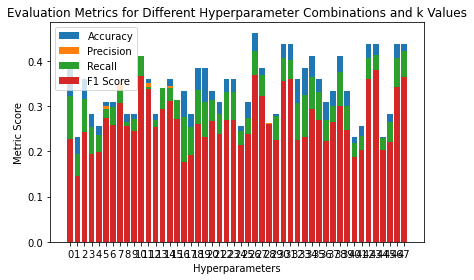

In [98]:
run_random_forest(X,y)

# Presence Heatmap

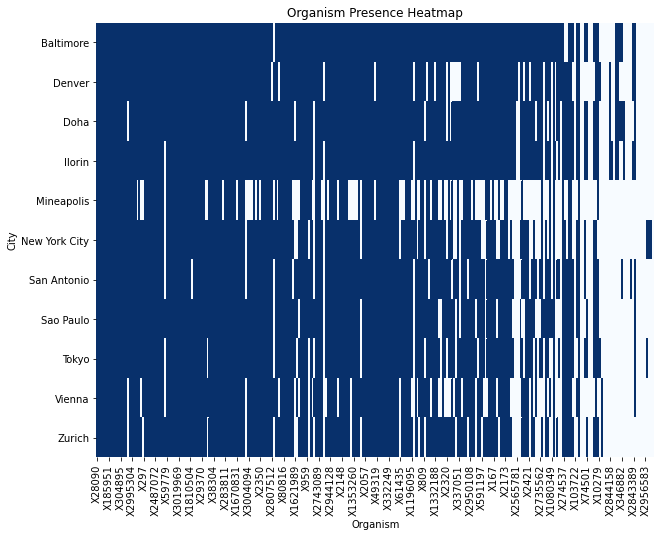

In [103]:
data = df17
X = data.iloc[:, 7:]  
y = data["City"] 
X = X.applymap(lambda x: 1 if x > 0 else 0)
presence = pd.concat([y, X], axis=1)
P = presence.groupby(['City']).sum().reset_index()
city = P['City']
rest = P.iloc[:, 1:].applymap(lambda x: 1 if x > 0 else 0)
P = pd.concat([city, rest], axis=1)
P.set_index('City', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(P, cmap='Blues', cbar=False)
plt.title('Organism Presence Heatmap')
plt.xlabel('Organism')
plt.ylabel('City')
plt.xticks(rotation=90)

# Show the heatmap
plt.show()

# Try with different Scaling / Distributions

Distribution of Unscaled data:

The best model has Max Depth = 5, Number of Trees = 100, k = 200, and Max Accuracy is 0.8000


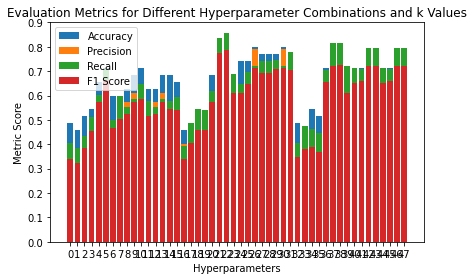

Distribution of Data after min-max scaling:

The best model has Max Depth = 10, Number of Trees = 100, k = 200, and Max Accuracy is 0.8571


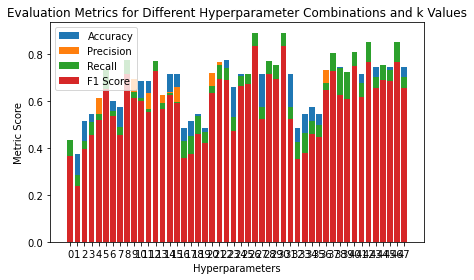

Distribution of Data after max-abs scaling:

The best model has Max Depth = 10, Number of Trees = 100, k = 200, and Max Accuracy is 0.8571


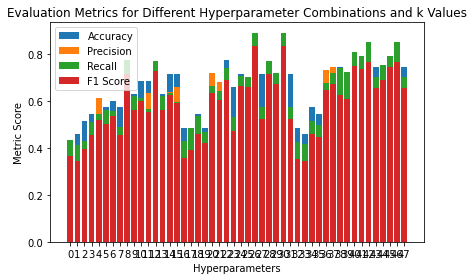

Distribution of Data after quantile transformation (uniform pdf):

The best model has Max Depth = 10, Number of Trees = 100, k = 280, and Max Accuracy is 0.8857


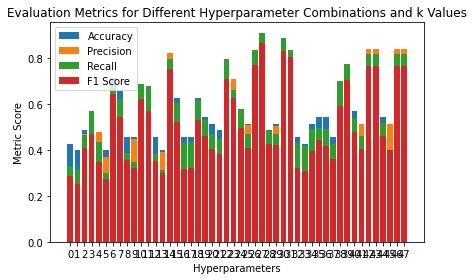

Distribution of Data after sample-wise L2 normalizing:

The best model has Max Depth = 10, Number of Trees = 20, k = 280, and Max Accuracy is 0.8000


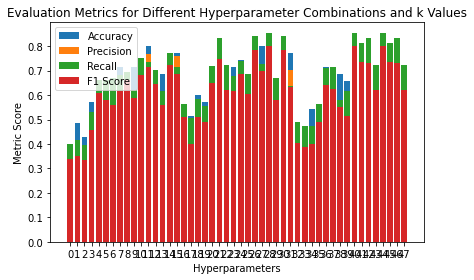

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

data = df16

X = data.iloc[:, 7:]  
y = data["City"] 
# run_random_forest(X,y)

distributions = [
    ("Unscaled data", X),
    # ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    # (
    #     "Data after robust scaling",
    #     RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    # ),
    # (
    #     "Data after power transformation (Yeo-Johnson)",
    #     PowerTransformer(method="yeo-johnson").fit_transform(X),
    # ),
    # (
    #     "Data after power transformation (Box-Cox)",
    #     PowerTransformer(method="box-cox").fit_transform(X),
    # ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    # (
    #     "Data after quantile transformation (gaussian pdf)",
    #     QuantileTransformer(output_distribution="normal").fit_transform(X),
    # ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]


for p in distributions:
    print(f"Distribution of {p[0]}:")
    run_random_forest(p[1],y)

